# Model: ARIMA 

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:
- p (past values used for forecasting the next value)
- q (past forecast errors used to predict the future values)
- d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import math
from sklearn.metrics import mean_squared_error

plt.style.use('fivethirtyeight')

In [2]:
# Read in data.
stocks = pd.read_csv('../datasets/tweets/combined_trump_index.csv', sep='\t')

In [3]:
stocks=stocks.drop(['Unnamed: 0', 'vader sentiment'], axis=1)

In [4]:
stocks.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Close_TTI,Volume_TTI
0,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,0.135696,2269.965939,8.042219e+09
1,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,-0.056192,2267.777551,1.557123e+09
2,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,0.908453,2267.919940,6.440903e+09
3,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,0.312087,2288.893518,2.894899e+09
4,2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,0.041381,2298.631683,-1.761134e+09


In [5]:
# Change date column to be datetime dtype
stocks["Date"] = pd.to_datetime(stocks["Date"])
stocks.dtypes

Date                   datetime64[ns]
High                          float64
Low                           float64
Open                          float64
Close                         float64
Volume                          int64
Adj Close                     float64
Return                        float64
Intraday Return               float64
Volume Return                 float64
Open-Close Movement           float64
High-Low Ratio                float64
retweet_count                   int64
favorite_count                  int64
vader compound                float64
Trump Twitter Index           float64
Close_TTI                     float64
Volume_TTI                    float64
dtype: object

In [6]:
stocks.set_index('Date', inplace=True)
stocks.sort_index(inplace=True)
stocks.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Close_TTI,Volume_TTI
Date,,,,,,,,,,,,,,,,,
2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,0.135696,2269.965939,8.042219e+09
2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,-0.056192,2267.777551,1.557123e+09
2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,0.908453,2267.919940,6.440903e+09
2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,0.312087,2288.893518,2.894899e+09
2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,0.041381,2298.631683,-1.761134e+09


In [7]:
# Convert the date to a weekly format
stocks = stocks.resample('W').mean()
stocks

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Close_TTI,Volume_TTI
Date,,,,,,,,,,,,,,,,,
2017-01-22,2276.959961,2265.010010,2269.959961,2271.310059,3.524970e+09,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061.0,1878671.0,2.281500,0.135696,2269.965939,8.042219e+09
2017-01-29,2291.193994,2279.656006,2284.437939,2287.002002,3.511188e+09,2287.002002,0.002060,0.001130,-0.016062,0.092493,0.507231,141860.6,710645.6,0.780600,0.186372,2284.446160,2.738338e+09
2017-02-05,2287.304004,2273.443945,2282.170020,2283.518018,3.800202e+09,2283.518018,0.000247,0.000592,0.031739,-0.034665,0.609886,193941.0,899926.4,0.604400,0.246183,2282.180821,2.343210e+09
2017-02-12,2304.359961,2294.364014,2297.734033,2300.856055,3.464088e+09,2300.856055,0.001625,0.001358,-0.003245,0.026577,0.435714,143217.0,665438.4,-0.487880,0.217995,2297.743549,-1.413386e+09
2017-02-19,2344.586035,2331.370020,2335.214014,2342.691992,3.566332e+09,2342.691992,0.003012,0.003208,0.003332,-0.019432,0.566876,138157.6,642697.6,0.112260,0.134906,2335.219818,2.730865e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-22,3205.107959,3194.829980,3197.977979,3200.339990,4.415626e+09,3200.339990,0.003291,0.000743,0.147812,0.254662,0.321791,429175.6,1824081.2,5.760360,-0.371744,3197.966403,2.963567e+10
2019-12-29,3235.554993,3226.095032,3231.482483,3231.829956,2.236625e+09,3231.829956,0.001458,0.000111,-0.077913,0.134764,0.293059,289457.5,1164567.0,-0.171025,-1.000363,3231.451567,-1.686321e+09
2020-01-05,3244.232422,3221.617554,3231.575012,3236.192566,3.206660e+09,3236.192566,-0.000379,0.001436,0.099249,-0.181045,0.701929,320461.5,1490103.5,0.065125,-0.088161,3231.572394,-3.461532e+08


In [8]:
print(stocks.shape)

(157, 17)


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


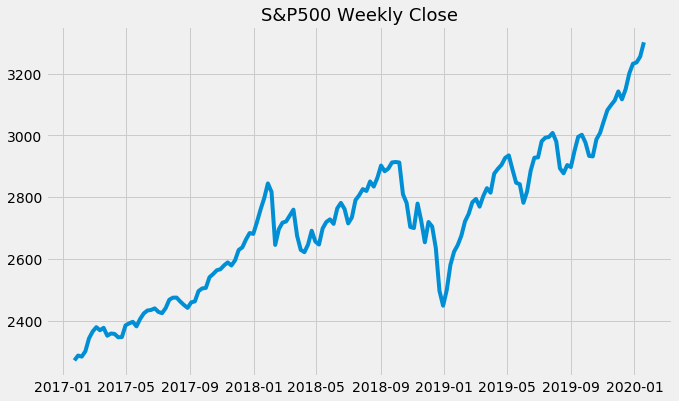

In [9]:
# Plot data.
plt.figure(figsize=(10,6))
plt.plot(stocks['Close'])
plt.title(label = 'S&P500 Weekly Close', fontsize=18)
plt.show();

In [10]:
# This is for eXogenous
stocks['Close_TTI_lag_1'] = stocks['Close_TTI'].shift(1)
stocks.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,Trump Twitter Index,Close_TTI,Volume_TTI,Close_TTI_lag_1
Date,,,,,,,,,,,,,,,,,,
2017-01-22,2276.959961,2265.010010,2269.959961,2271.310059,3.524970e+09,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061.0,1878671.0,2.28150,0.135696,2269.965939,8.042219e+09,NaN
2017-01-29,2291.193994,2279.656006,2284.437939,2287.002002,3.511188e+09,2287.002002,0.002060,0.001130,-0.016062,0.092493,0.507231,141860.6,710645.6,0.78060,0.186372,2284.446160,2.738338e+09,2269.965939
2017-02-05,2287.304004,2273.443945,2282.170020,2283.518018,3.800202e+09,2283.518018,0.000247,0.000592,0.031739,-0.034665,0.609886,193941.0,899926.4,0.60440,0.246183,2282.180821,2.343210e+09,2284.446160
2017-02-12,2304.359961,2294.364014,2297.734033,2300.856055,3.464088e+09,2300.856055,0.001625,0.001358,-0.003245,0.026577,0.435714,143217.0,665438.4,-0.48788,0.217995,2297.743549,-1.413386e+09,2282.180821
2017-02-19,2344.586035,2331.370020,2335.214014,2342.691992,3.566332e+09,2342.691992,0.003012,0.003208,0.003332,-0.019432,0.566876,138157.6,642697.6,0.11226,0.134906,2335.219818,2.730865e+08,2297.743549


## Train/Test Split

The goal, as with all train/test splits, is to:
- avoid overfitting in our model, and
- to get an unbiased estimate of model performance on new, "unseen" data.

When fitting a time series model, it will not be a random train-test split like with non-correlated data.

Since the goal with time series analysis is almost always to forecast values forward in time, the idea with a time series train/test split is to train on earlier data and test/evaluate on later data.

Most commonly, the following will be set:
- training set to be the "first" 67% - 80% of the data timewise.
- test set be the "last" 20% - 33% timewise.

Split the dataframe by taking the first 80% of rows for training and the rest for testing.

In [11]:
# What index gives us our 80th percentile of rows?
round(stocks.shape[0]*(4/5))

126

In [12]:
# Set training data to be first 80% of rows.
train = stocks.iloc[0:126]

In [13]:
# Set training data to be last 20% of rows.
test =stocks.iloc[126:]

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
# Instantiate an AR(1) model on training data.
# Note this training data consists of the 
# time periods 0 through 125.
ar1 = ARIMA(endog=train['Close'], order = (1,0,0))

# Fit AR(1) model.
model = ar1.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 126, end=156)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

Score: 60470.03063674 MSE (245.90654858 RMSE)


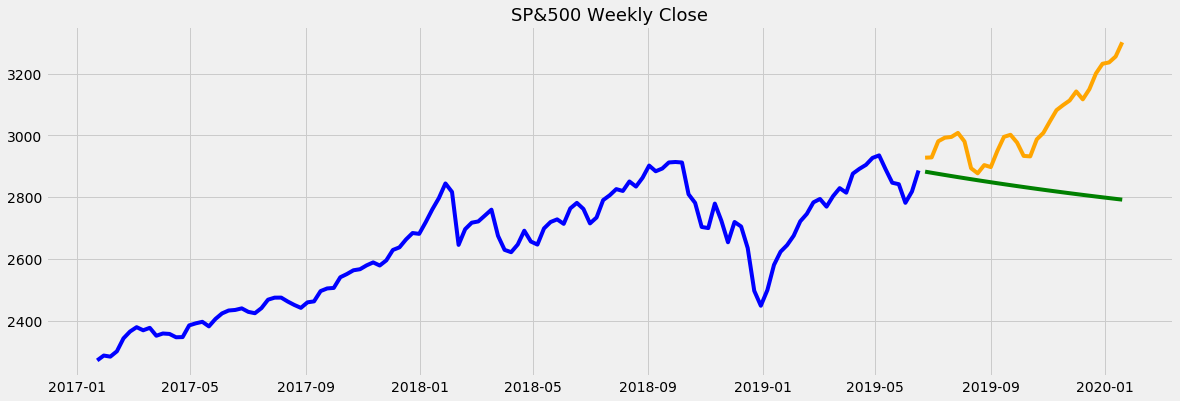

In [16]:
# Plot data.
plt.figure(figsize=(18,6))

# Plot training data in blue.
plt.plot(train['Close'], color = 'blue')

# Plot testing data in orange.
plt.plot(test['Close'], color = 'orange')

# Plot predicted values in green.
plt.plot(preds, color = 'green')

plt.title(label = 'SP&500 Weekly Close', fontsize=18)
plt.show();

> As seen above, the model is not a particularly good, with an RMSE of 245.9 (compared to baseline RMSE of 108.84) Therefore, to explore improvements of model by fitting an ARIMA model as per below. 

# ARIMA 

- An AR (autoregressive) model is used when the goal is to measure/predict long-term trends.
- An MA (moving average) model is used when the goal is to anticipate the time series will have substantial, sudden shocks in the data.
- The assumption that the data is stationarity must be met in order for to fit an ARIMA model. This can be verified visually by examining the original data plot (for a constant mean) and autocorrelation plot (for autocorrelation) or execute the augmented Dickey-Fuller test.

In [17]:
#Import Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic', 'p-value'] )
    return dfoutput

interpret_dftest(adfuller(train['Volume']))

Test Statistic   -3.001158
p-value           0.034786
dtype: float64

> As the  𝑝-value of 0.034786 is less than the reasonable choices for 𝛼 of 0.05, therefore there is enough evidence to reject the null hypothesis and accept that the time series is stationary.

### Choosing the right values of $p$, $d$, and $q$.

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

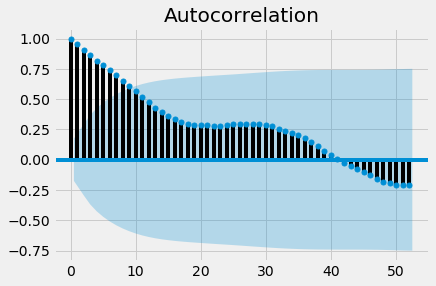

In [19]:
# Generate autocorrelation plot on training data.
plot_acf(train['Close'], lags = 52);
# Note: we would generate the ACF plot on 
# differenced data, if we needed to difference
# in order to achieve stationarity!

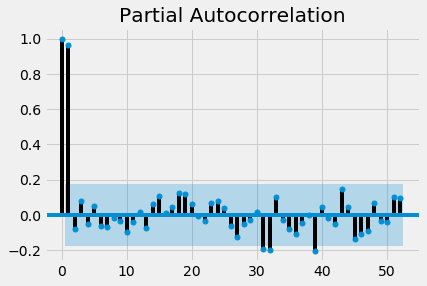

In [20]:
# Generate partial autocorrelation plot on training data.
plot_pacf(train['Close'], lags = 52);

# Note: we would generate the PACF plot on 
# differenced data, if we needed to difference
# in order to achieve stationarity!

In [21]:
# Instantiate an AR(1) model on training data.
# Note this training data consists of the 
# time periods 0 through 125.
ar1 = ARIMA(endog = train['Close'],
            order = (1, 0, 0)) # (p, d, q)

# Fit AR(1) model.
model = ar1.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 126, end=156)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

Score: 60470.03063674 MSE (245.90654858 RMSE)


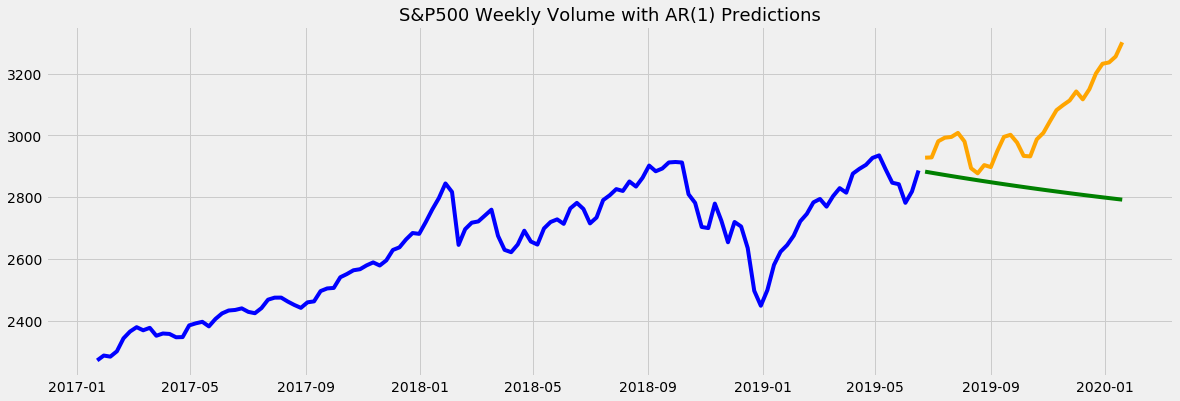

In [22]:
# Plot data.
plt.figure(figsize=(18,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Weekly Volume with AR(1) Predictions', fontsize=18)
plt.show();

In [23]:
# Instantiate an AR(2) model on training data.
# Note this training data consists of the 
# time periods 0 through 125.
ar2 = ARIMA(endog = train['Close'],
            order = (2,0,0) ) # (p, d, q)

# Fit AR(2) model.
model = ar2.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 126, end=156)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

Score: 70326.11832126 MSE (265.19072065 RMSE)


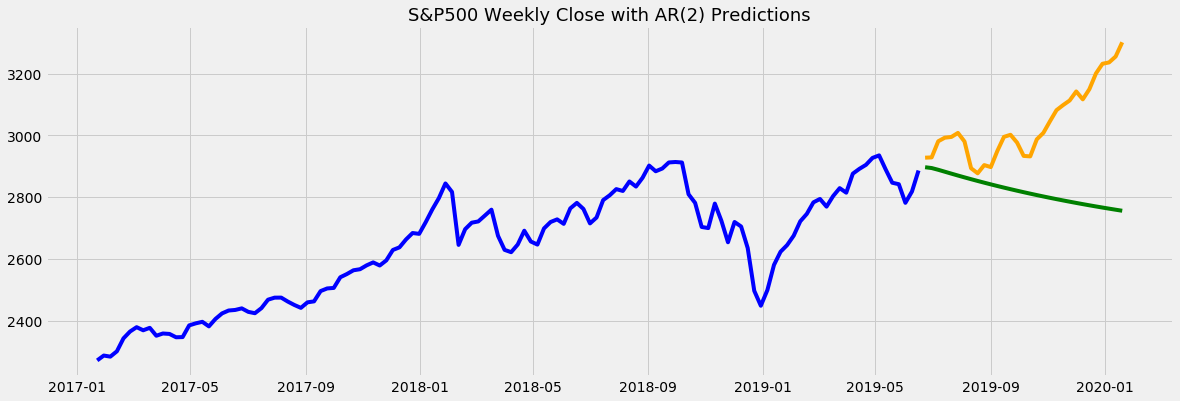

In [24]:
# Plot data.
plt.figure(figsize=(18,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Weekly Close with AR(2) Predictions', fontsize=18)
plt.show();

> None of the above appear to be particularly good, either, with an RMSE of 245.91 and 265.19 (compared to baseline RMSE of 108.84) respectively. 
> 
> As seen earlier, an auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.
>
> As its evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part. In the next section, I will implement a time series model that takes both trend and seasonality of a series into account.

## Seasonal Model

Seasonality is like a repeating pattern (a cycle) that occurs over time.

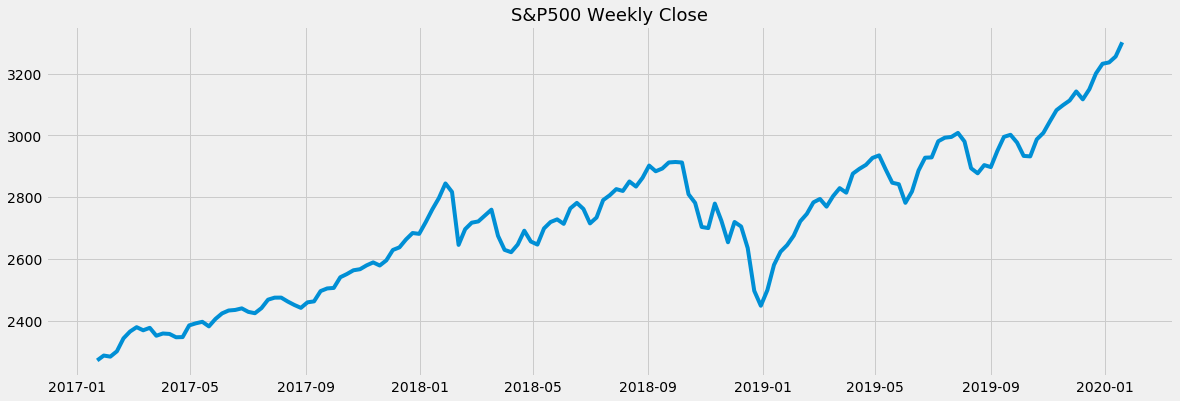

In [25]:
# Plot data.
plt.figure(figsize=(18,6))
plt.plot(stocks['Close'])
plt.title(label = 'S&P500 Weekly Close', fontsize=18)
plt.show();

> By looking at this graphh, there seems to be some evidence of seasonality.

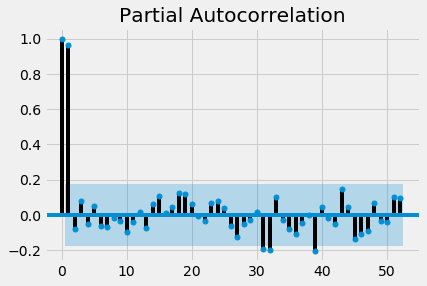

In [26]:
# Generate partial autocorrelation plot on training data.
plot_pacf(train['Close'], lags = 52);

Therefore, to fit a **seasonal ARIMA (SARIMA) model** to the data. This model will:
- Have the ARIMA components as described thus far, which are good for stationary trends.
- Include a seasonal component that will also allow to account for seasonality that occurs over time.

The SARIMA model is given by $ARIMA(p, d, q) × (P, D, Q, S)$, where:
- $ARIMA(p, d, q)$ is the ARIMA model as already discussed with AR order $p$, MA order $q$, and differencing order $d$.
- $(P, D, Q, S)$ refers to the seasonal AR order $P$, the seasonal MA order $Q$, the seasonal differencing order $D$, and the length of the season $S$.

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Score: 38618.71713069 MSE (196.51645511 RMSE)


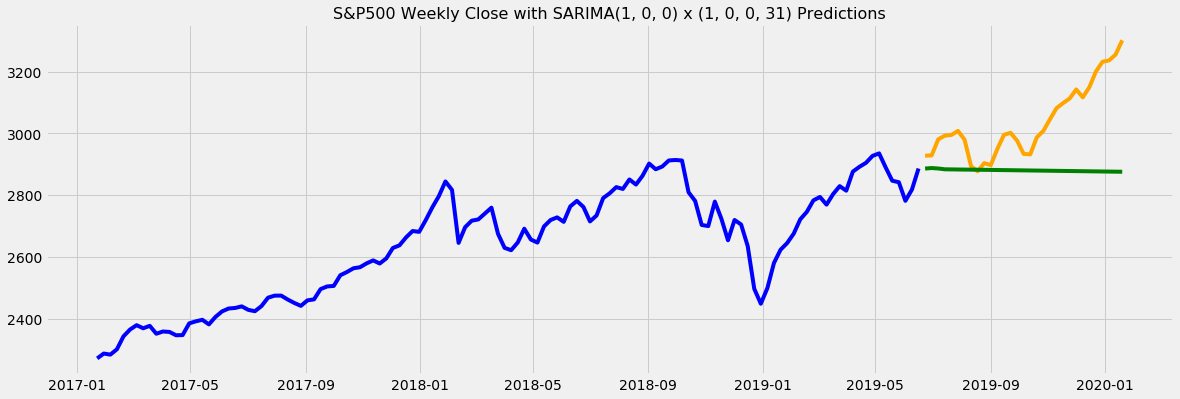

In [28]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 31) model.

sarima = SARIMAX( endog=train['Close'],
                  order = (1,0,0),              # (p, d, q)
                  seasonal_order = (1,0,0,4) )# (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 126, end=156)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

# Plot data.
plt.figure(figsize=(18,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Weekly Close with SARIMA(1, 0, 0) x (1, 0, 0, 31) Predictions', fontsize=16)
plt.show();

> As seen above, the predictions are more complex and visually slightly better match the data and an improved RMSE score of 193.09 from 245.90 (above). Below, I will try tweaking parameters $P$, $D$, $Q$, and $S$ to see how to improve the model and get the green line to better match the orange line.
> 
> Assume that the value, $S$, is 31 as it appears (based on the ACF plot and PACF plot) that each season/period is approximately 31 weeks.
>
> Generally, this is "most easily" done through a manual GridSearch process.

In [29]:
# Starting MSE and (P, D, Q).
mse = 99*(10**31)
final_P = 0
final_D = 0
final_Q = 0

for P in range(3):
    for Q in range(3):
        for D in range(3):
            try:
                # Instantiate SARIMA model.
                sarima = SARIMAX(endog = train['Close'],
                                 order = (1, 0, 0),              # (p, d, q)
                                 seasonal_order = (P, D, Q, 31)) # (P, D, Q, S)

                # Fit SARIMA model.
                model = sarima.fit()

                # Generate predictions based on training set.
                # Start at time period 0 and end at 125.
                preds = model.predict(start=0, end=125)

                # Evaluate predictions.
                print(f'The MSE for (1, 0, 0)x({P},{D},{Q},31) is: {mean_squared_error(train["Close"], preds)}')
                
                # Save for final report.
                if mse > mean_squared_error(train["Close"], preds):
                      mse = mean_squared_error(train["Close"], preds)
                      final_P = P
                      final_D = D
                      final_Q = Q
                      
            except:
                pass
print('*************************************')
print(f'Our model that minimizes MSE on the training data is the SARIMA(1, 0, 0)x({final_P},{final_D},{final_Q},31).')
print(f'This model has an MSE of {mse}.')

/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


The MSE for (1, 0, 0)x(0,0,0,31) is: 42420.95881086522
The MSE for (1, 0, 0)x(0,1,0,31) is: 1167099.1547697803
The MSE for (1, 0, 0)x(0,2,0,31) is: 1475186.9337947075


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


The MSE for (1, 0, 0)x(0,0,1,31) is: 42365.5943019161


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


The MSE for (1, 0, 0)x(0,1,1,31) is: 1081011.9018325687


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


The MSE for (1, 0, 0)x(1,0,0,31) is: 42360.70152180413
The MSE for (1, 0, 0)x(1,1,0,31) is: 1095495.9132413848
The MSE for (1, 0, 0)x(1,2,0,31) is: 1387990.3584574067


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


The MSE for (1, 0, 0)x(1,0,1,31) is: 42356.22222947091
The MSE for (1, 0, 0)x(1,1,1,31) is: 1082465.441169147


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


The MSE for (1, 0, 0)x(2,0,0,31) is: 42358.52114181291
The MSE for (1, 0, 0)x(2,1,0,31) is: 1082683.8838877834


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


The MSE for (1, 0, 0)x(2,2,0,31) is: 1504638.6364869685


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


The MSE for (1, 0, 0)x(2,0,1,31) is: 42354.05418544084
The MSE for (1, 0, 0)x(2,1,1,31) is: 1082048.3847811646
*************************************
Our model that minimizes MSE on the training data is the SARIMA(1, 0, 0)x(2,0,1,31).
This model has an MSE of 42354.05418544084.


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Score: 30542.61912003 MSE (174.76446756 RMSE)


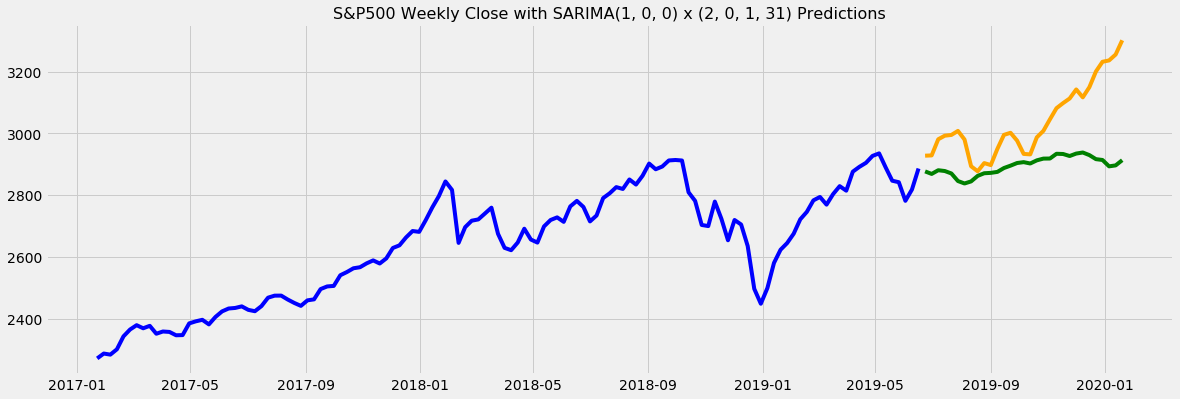

In [30]:
# Fit and visualize a SARIMA(1, 0, 0) x (2, 0, 1, 31) model.

sarima = SARIMAX(endog=train['Close'], order=(1,0,0), seasonal_order=(2,0,1,31))

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 126, end=156)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

# Plot data.
plt.figure(figsize=(18,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Weekly Close with SARIMA(1, 0, 0) x (2, 0, 1, 31) Predictions', fontsize=16)
plt.show();

> As seen above, the predictions are more complex and visually slightly better match the data and an improved RMSE score of 174.76 from 193.09 (above). However, this is still below the baseline RMSE of 108.84. 

# eXogenous Predictors

In time series analysis, most time is focused on how to quantify the relationship between $Y_t$ and $Y_{t-k}$ and then use that relationship to forecast values of $Y_t$.

Future performance of S&P500 Index is highly not limited to purely on past performance of S&P500 Index. The performance of S&P500 will be based on many several factors i.e. performance of its competitors, interest rates, politics etc. 

However, $X$ variables can still be used in the data - in `statsmodels` and in various disciplines like econometrics, the $X$ variables are known as `exogenous`. The SARIMAX model stands for "Seasonal Autoregressive Integrated Moving Average with eXogenous regressors model."

#### One important practical note: 
To fit a SARIMAX model, it is important to enure that the $X$ variable makes sense - especially timewise.
> For example, in order to predict S&P500 stock volume for January 2020 based on Trump Twitter Index's close price, it will not be wise to use Trump Twitter Index's close price in January 2020 as an input. (as it is not relevant to forecast a value of $Y$ when there is no available information/access to that value of $X$.) Therefore, $X$ variable should be lag by at least one time point as above:
>
> `stocks['Close_TTI_lag_1'] = stocks['Close_TTI'].shift(1)`

/Users/audreywong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Score: 1340.14359033 MSE (36.60797168 RMSE)


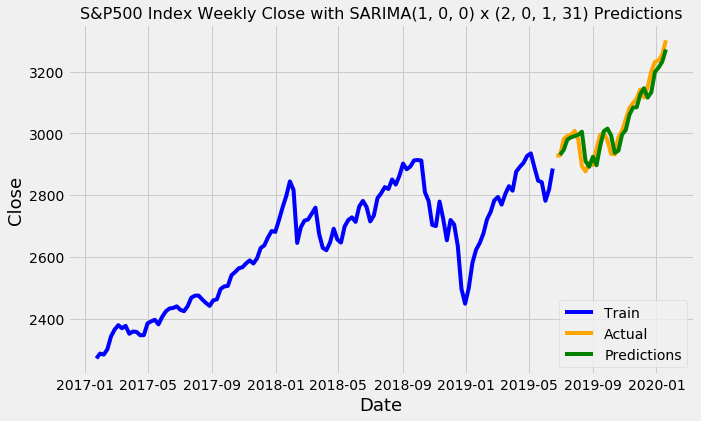

In [31]:
# Fit and visualize a SARIMAX(1, 0, 0) x (2, 0, 1, 31) model.

sarima = SARIMAX(endog = train['Close'].iloc[1:],
                 order = (1, 0, 0),              # (p, d, q)
                 seasonal_order = (2,0,1,31), # (P, D, Q, S)
                 exog = train['Close_TTI_lag_1'].iloc[1:])

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 155.
preds = model.predict(start= 126, end=155, exog=test[['Close_TTI_lag_1']])

# Evaluate predictions.
mse = mean_squared_error(test['Close'].iloc[1:], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (mse, math.sqrt(mse)))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Index Weekly Close with SARIMA(1, 0, 0) x (2, 0, 1, 31) Predictions', fontsize=16)
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show();

> SARIMAX (like most time series forecasting techniques) tries to capture the trend and seasonality from past data. This model usually performs well on time series datasets abd appears to live up to its reputation in this case - with a RMSE of 36.61 (significant improvement from baseline RMSE of 108.84). 
> 
> It is known that stock prices do not have a particular trend or seasonality as it is highly depends on what is currently going on in the market and thus the prices rise and fall. Hence forecasting techniques like ARIMA and SARIMA may not show the best results for this particular problem.
>
> Next, I will go ahead and try another advanced technique – Long Short Term Memory (LSTM) in notebook "3.3_Model_LSTM"